In [1]:
from api_keys import weather_api_key
import json
import requests
import random
import requests
import scipy.stats as st
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time




In [2]:
longitude_list = []
latitude_list = []
city_list = []
dup_city_list = []
dup_cnt = 0
city_cnt = 0

for x in range(10000):
    if city_cnt < 600:
        latitude = round(random.uniform(-90, 90), 2)
        longitude = round(random.uniform(-180, 180), 2)
        city = citipy.nearest_city(latitude, longitude).city_name
        if city not in city_list:
            city_list.append(city)
            city_cnt += 1
            print(city_cnt)
        elif city in city_list:
            dup_city_list.append(city)
            dup_cnt += 1
            print(city_cnt, dup_cnt)
    elif city_cnt == 600:
        break
        
# test for duplicate cities
test_unique_city_df = pd.DataFrame(city_list)
duplicates = test_unique_city_df[test_unique_city_df.duplicated()]     
print(f"Number of duplicates in city_list: {len(duplicates)}")
print(f"Number of duplicates pushed into a separate list: {len(dup_city_list)}")
print(f"Number of cities: {len(city_list)}")
print(city_list)

1
2
3
4
5
6
7
8
9
10
11
12
13
13 1
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
39 2
39 3
40
41
42
43
44
44 4
45
45 5
46
47
48
49
49 6
49 7
50
50 8
51
52
53
53 9
54
55
55 10
56
57
57 11
58
59
60
60 12
61
62
62 13
62 14
63
64
65
65 15
66
67
68
68 16
69
70
71
72
72 17
73
74
75
75 18
75 19
76
77
78
79
79 20
80
81
81 21
81 22
82
82 23
82 24
83
84
84 25
84 26
84 27
84 28
85
85 29
85 30
86
86 31
87
88
88 32
88 33
89
90
90 34
90 35
91
91 36
91 37
91 38
91 39
91 40
92
93
94
95
96
97
98
99
100
101
102
103
104
104 41
104 42
105
106
106 43
106 44
106 45
107
107 46
108
108 47
108 48
109
110
111
112
113
114
115
115 49
115 50
116
116 51
116 52
117
118
118 53
119
119 54
120
120 55
121
122
122 56
123
124
125
126
127
128
128 57
129
129 58
130
130 59
130 60
130 61
130 62
130 63
130 64
131
131 65
132
132 66
133
133 67
134
134 68
134 69
135
136
136 70
136 71
137
138
139
140
140 72
141
141 73
141 74
141 75
142
142 76
143
143 77
144
145
145 78
146
147
148
148 79
148 80
149
1

555 810
555 811
555 812
555 813
555 814
556
557
557 815
557 816
557 817
557 818
558
559
560
561
561 819
561 820
561 821
562
563
563 822
563 823
564
564 824
565
565 825
566
566 826
566 827
566 828
567
568
569
569 829
570
570 830
571
571 831
571 832
571 833
571 834
572
572 835
573
574
574 836
574 837
574 838
574 839
574 840
574 841
575
576
576 842
577
577 843
577 844
577 845
577 846
577 847
577 848
577 849
578
578 850
578 851
578 852
578 853
578 854
579
579 855
579 856
579 857
580
580 858
580 859
580 860
580 861
580 862
580 863
580 864
581
581 865
582
583
583 866
583 867
583 868
583 869
584
585
586
586 870
586 871
586 872
586 873
586 874
586 875
586 876
587
588
588 877
588 878
589
590
590 879
590 880
590 881
590 882
591
591 883
591 884
591 885
591 886
591 887
591 888
591 889
591 890
591 891
592
592 892
592 893
592 894
592 895
593
593 896
594
594 897
594 898
594 899
594 900
594 901
595
595 902
596
597
597 903
598
598 904
598 905
599
599 906
599 907
599 908
599 909
599 910
600
Number of du

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
temp_list = []
lat_list = []
lng_list = []
hum_list = []
wind_list = []
cloud_list = []
city_list_extended = []
country_list = []
date_list = []
api_cnt = 0
set_cnt = 1

for city in city_list:
    if api_cnt < 50:
        api_cnt += 1
        # add try and except in case query url doesn't exist
        query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        try:
            #get temp from weather_json
            temp = weather_json["main"]["temp_max"]
            temp_list.append(temp)
        except (KeyError):
            pass
#             temp = -9999999999
#             temp_list.append(temp)
  
        try:
            #get humidity from weather_json
            hum = weather_json["main"]["humidity"]
            hum_list.append(hum)
        except (KeyError):
            pass
#             hum = -9999999999
#             hum_list.append(hum)
    
        try:
            #get windspeed from weather_json
            wind_speed = weather_json["wind"]["speed"]
            wind_list.append(wind_speed)
        except (KeyError):
            pass
#             wind_speed = -9999999999
#             wind_list.append(wind_speed)
            
        try:
            #get cloudiness from weather_json
            cloudiness = weather_json["clouds"]["all"]
            cloud_list.append(cloudiness)            
        except:
            pass
            #get cloudiness from weather_json
#             cloudiness = -9999999999
#             cloud_list.append(cloudiness)
    
        try:
            #get latitude from weather_json
            latitude = weather_json["coord"]["lat"]
            lat_list.append(latitude)
        except:
            pass
#             latitude = -9999999999
#             lat_list.append(latitude)
            
        try:
            #get longitude from weather_json
            longitude = weather_json["coord"]["lon"]
            lng_list.append(longitude)
        except:
            pass
#             longitude = -9999999999
#             lng_list.append(longitude)
        
        try:
            #get country from weather_json
            country = weather_json["sys"]["country"]
            country_list.append(country)
        except:
            pass
#             country = ""
#             country_list.append(country)

        try:
            #get date from weather_json
            date = weather_json["dt"]
            date_list.append(date)
        except:
            pass
#             country = ""
#             country_list.append(country)
      
        city_list_extended = [city_list, temp_list, hum_list, wind_list, cloud_list, lat_list, lng_list, country_list, date_list]
        
        print(f"Processing record {api_cnt} of Set {set_cnt}, City Name: {city}")
    
    elif api_cnt == 50:
        api_cnt = 0
        set_cnt += 1
        time.sleep(60)
        
city_df = pd.DataFrame(city_list_extended).transpose().rename(columns = {0: "City", 1: "Max Temperature", 2: "Humidity", 3: "Wind Speed", 4: "Cloudiness", 5: "Latitude", 6: "Longitude", 7: "Country", 8: "Date"})


Processing record 1 of Set 1, City Name: hobart
Processing record 2 of Set 1, City Name: atuona
Processing record 3 of Set 1, City Name: rikitea
Processing record 4 of Set 1, City Name: kaitangata
Processing record 5 of Set 1, City Name: olinda
Processing record 6 of Set 1, City Name: provideniya
Processing record 7 of Set 1, City Name: ouro fino
Processing record 8 of Set 1, City Name: noumea
Processing record 9 of Set 1, City Name: taolanaro
Processing record 10 of Set 1, City Name: busselton
Processing record 11 of Set 1, City Name: aborlan
Processing record 12 of Set 1, City Name: malinovoye ozero
Processing record 13 of Set 1, City Name: khatanga
Processing record 14 of Set 1, City Name: port alfred
Processing record 15 of Set 1, City Name: lekoni
Processing record 16 of Set 1, City Name: bredasdorp
Processing record 17 of Set 1, City Name: geraldton
Processing record 18 of Set 1, City Name: saint-philippe
Processing record 19 of Set 1, City Name: illoqqortoormiut
Processing recor

Processing record 12 of Set 4, City Name: kumbo
Processing record 13 of Set 4, City Name: belushya guba
Processing record 14 of Set 4, City Name: vegreville
Processing record 15 of Set 4, City Name: qostanay
Processing record 16 of Set 4, City Name: de-kastri
Processing record 17 of Set 4, City Name: richards bay
Processing record 18 of Set 4, City Name: sharan
Processing record 19 of Set 4, City Name: poum
Processing record 20 of Set 4, City Name: chuy
Processing record 21 of Set 4, City Name: longyearbyen
Processing record 22 of Set 4, City Name: east london
Processing record 23 of Set 4, City Name: arraial do cabo
Processing record 24 of Set 4, City Name: kasungu
Processing record 25 of Set 4, City Name: pouembout
Processing record 26 of Set 4, City Name: portland
Processing record 27 of Set 4, City Name: toamasina
Processing record 28 of Set 4, City Name: yellowknife
Processing record 29 of Set 4, City Name: edendale
Processing record 30 of Set 4, City Name: temir
Processing record

Processing record 24 of Set 7, City Name: mulatupo
Processing record 25 of Set 7, City Name: znamensk
Processing record 26 of Set 7, City Name: bollnas
Processing record 27 of Set 7, City Name: sauce
Processing record 28 of Set 7, City Name: loiza
Processing record 29 of Set 7, City Name: pilar
Processing record 30 of Set 7, City Name: acajutla
Processing record 31 of Set 7, City Name: rotifunk
Processing record 32 of Set 7, City Name: sistranda
Processing record 33 of Set 7, City Name: harnai
Processing record 34 of Set 7, City Name: broken hill
Processing record 35 of Set 7, City Name: talaya
Processing record 36 of Set 7, City Name: xining
Processing record 37 of Set 7, City Name: olafsvik
Processing record 38 of Set 7, City Name: ak-dovurak
Processing record 39 of Set 7, City Name: son la
Processing record 40 of Set 7, City Name: tilichiki
Processing record 41 of Set 7, City Name: geresk
Processing record 42 of Set 7, City Name: betong
Processing record 43 of Set 7, City Name: san 

Processing record 34 of Set 10, City Name: ostrovnoy
Processing record 35 of Set 10, City Name: diu
Processing record 36 of Set 10, City Name: goderich
Processing record 37 of Set 10, City Name: seoul
Processing record 38 of Set 10, City Name: limbang
Processing record 39 of Set 10, City Name: macau
Processing record 40 of Set 10, City Name: kysyl-syr
Processing record 41 of Set 10, City Name: beringovskiy
Processing record 42 of Set 10, City Name: guiratinga
Processing record 43 of Set 10, City Name: thunder bay
Processing record 44 of Set 10, City Name: vila
Processing record 45 of Set 10, City Name: masterton
Processing record 46 of Set 10, City Name: sucua
Processing record 47 of Set 10, City Name: husavik
Processing record 48 of Set 10, City Name: freeport
Processing record 49 of Set 10, City Name: muslyumovo
Processing record 50 of Set 10, City Name: alexandria
Processing record 1 of Set 11, City Name: rzhaksa
Processing record 2 of Set 11, City Name: a
Processing record 3 of Set

In [17]:
def convert_to_float(df,column_name):
    df[column_name] = df[column_name].astype(float)
    return df[column_name]

convert_to_float(city_df,"Max Temperature")
convert_to_float(city_df,"Humidity")
convert_to_float(city_df,"Wind Speed")
convert_to_float(city_df,"Cloudiness")
convert_to_float(city_df,"Latitude")
convert_to_float(city_df,"Longitude")

city_df.to_csv("city.csv", encoding = "utf-8", index = False, header = True)
city_df.describe()

,Max Temperature,Humidity,Wind Speed,Cloudiness,Latitude,Longitude
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,11.032246,72.175781,3.618418,61.781250,18.142355,20.210125
std,16.789796,20.881371,2.580499,40.528686,33.894445,91.937052
min,-39.580000,9.000000,0.000000,0.000000,-54.800000,-179.166700
25%,-1.060000,62.000000,1.717500,18.750000,-9.662050,-60.093200
50%,17.905000,76.000000,3.090000,75.000000,20.915500,22.507050
75%,24.780000,89.000000,4.987500,100.000000,47.674125,101.726275
max,36.320000,99.000000,14.920000,100.000000,78.218600,179.316700


In [16]:
city_hum_p100 = city_df.loc[city_df["Humidity"] >= 100, :]
print(f"Number of cities with humidty > 100: {len(city_hum_p100)}")
city_hum_p100

Number of cities with humidty > 100: 0


,City,Max Temperature,Humidity,Wind Speed,Cloudiness,Latitude,Longitude,Country,Date


In [19]:
city_df = city_df.loc[city_df["Humidity"] < 100, :]
clean_city_data = city_df.dropna(how = "any", inplace = False)
print(f"Number of cities with humidity < 100: {len(city_df)}")
print(f"Number of cities after null removal: {len(clean_city_data)}")
clean_city_data.describe()

Number of cities with humidity < 100: 512
Number of cities after null removal: 512


,Max Temperature,Humidity,Wind Speed,Cloudiness,Latitude,Longitude
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,11.032246,72.175781,3.618418,61.781250,18.142355,20.210125
std,16.789796,20.881371,2.580499,40.528686,33.894445,91.937052
min,-39.580000,9.000000,0.000000,0.000000,-54.800000,-179.166700
25%,-1.060000,62.000000,1.717500,18.750000,-9.662050,-60.093200
50%,17.905000,76.000000,3.090000,75.000000,20.915500,22.507050
75%,24.780000,89.000000,4.987500,100.000000,47.674125,101.726275
max,36.320000,99.000000,14.920000,100.000000,78.218600,179.316700


In [7]:
clean_city_north_data = clean_city_data.loc[clean_city_data["Latitude"] >= 0, :]
min_north = clean_city_north_data["Latitude"].min()
print(f"Northern Hemisphere test, min latitude: {min_north}")

clean_city_south_data = clean_city_data.loc[clean_city_data["Latitude"] < 0, :]
max_south = clean_city_south_data["Latitude"].max()
print(f"Southern Hemisphere test, max latitude: {max_south}")


Northern Hemisphere test, min latitude: 0.5333
Southern Hemisphere test, max latitude: -0.1934


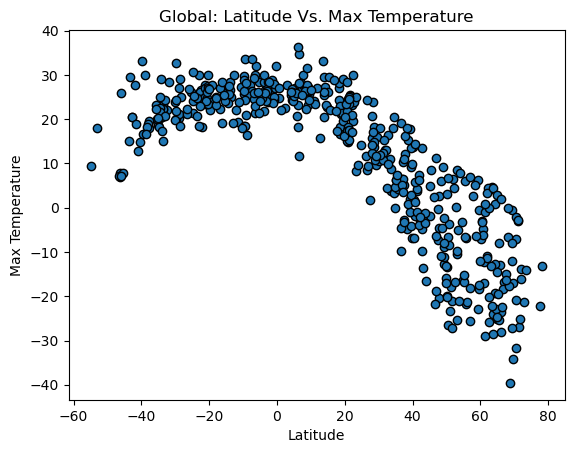

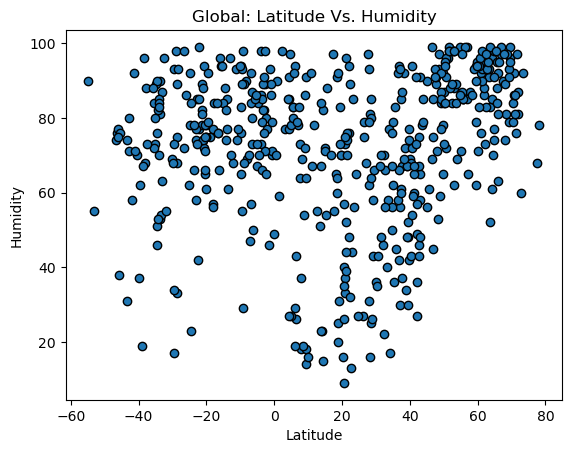

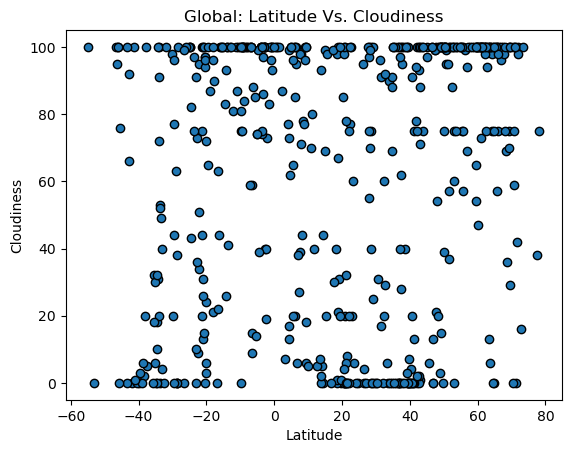

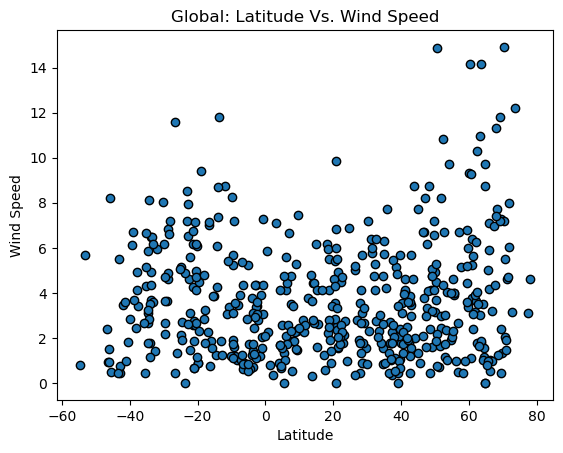

In [8]:
plot_list = ["Max Temperature", "Humidity", "Cloudiness", "Wind Speed"]
x_axis = "Latitude"


for plot in plot_list:
    plt.scatter(clean_city_data[x_axis], clean_city_data[plot], edgecolor = "black")
    plt.title(f"Global: {x_axis} Vs. {plot}")
    plt.xlabel(f"{x_axis}")
    plt.ylabel(f"{plot}")
    plt.savefig(f"Global {x_axis} Vs. {plot}.png")
    plt.show()

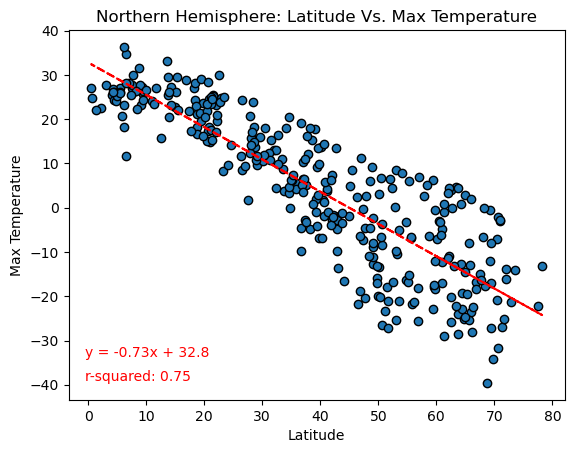

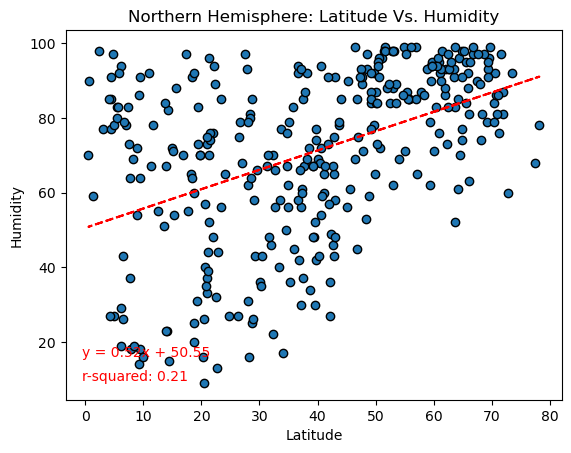

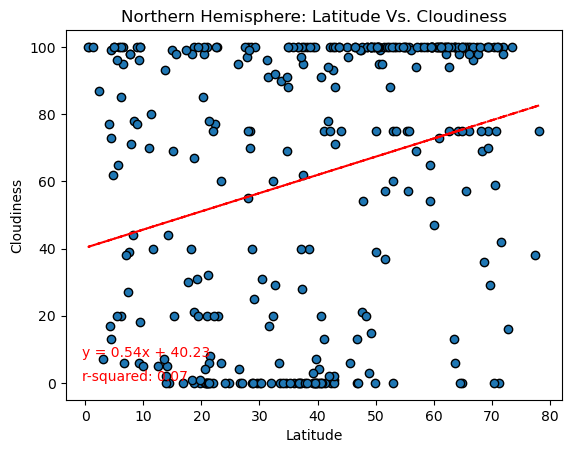

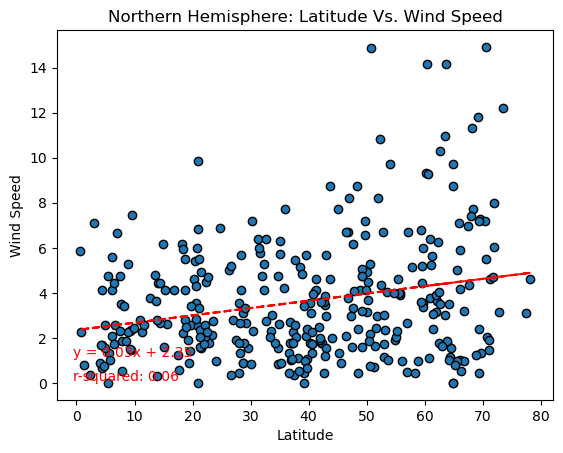

In [9]:
plot_list = ["Max Temperature", "Humidity", "Cloudiness", "Wind Speed"]
x_axis = "Latitude"


for plot in plot_list:
    plt.scatter(clean_city_north_data[x_axis], clean_city_north_data[plot], edgecolor = "black")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(clean_city_north_data[x_axis], clean_city_north_data[plot])
    regress_values = intercept + slope*clean_city_north_data[x_axis]
    line_eq = f"y = {str(round(slope, 2))}x + {round(intercept, 2)}"
    plt.plot(clean_city_north_data[x_axis], regress_values, "r--")
    r_squared_value = f"r-squared: {round(rvalue**2, 2)}"
    plt.title(f"Northern Hemisphere: {x_axis} Vs. {plot}")
    plt.xlabel(f"{x_axis}")
    plt.ylabel(f"{plot}")
    plt.figtext(.15, .2, line_eq, color = "r")
    plt.figtext(.15, .15, r_squared_value, color = "r")
    plt.savefig(f"Northern Hemisphere {x_axis} Vs. {plot}.png")
    plt.show()

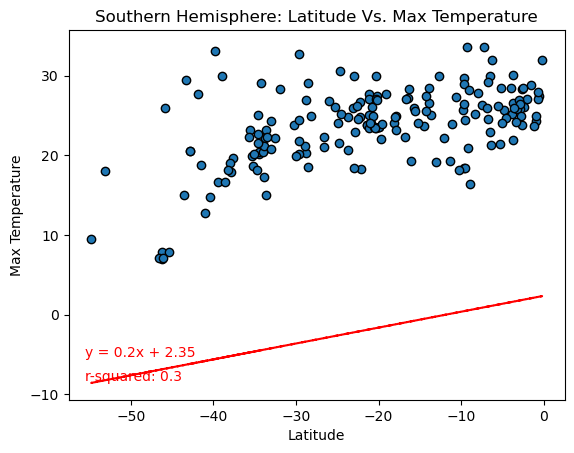

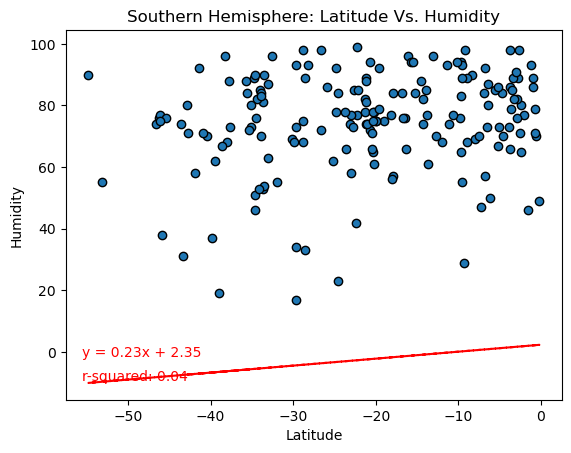

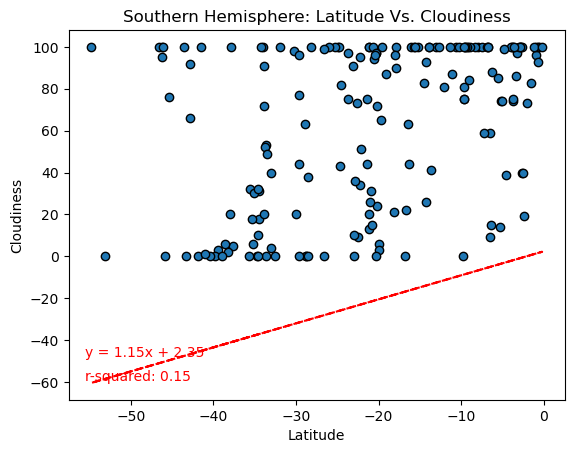

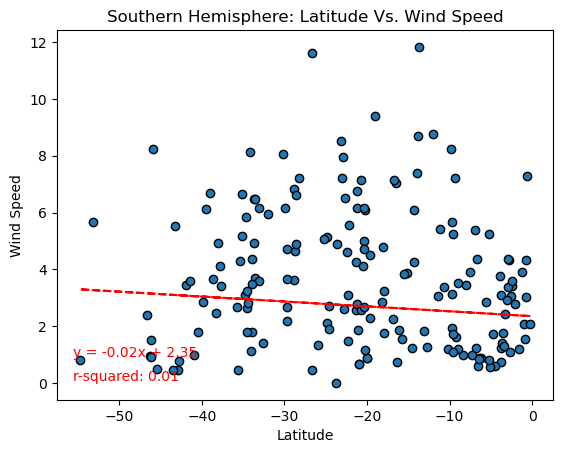

In [10]:
plot_list = ["Max Temperature", "Humidity", "Cloudiness", "Wind Speed"]
x_axis = "Latitude"


for plot in plot_list:
    plt.scatter(clean_city_south_data[x_axis], clean_city_south_data[plot], edgecolor = "black")
    (slope, intecept, rvalue, pvalue, stderr) = st.linregress(clean_city_south_data[x_axis], clean_city_south_data[plot])
    regress_values = intercept + clean_city_south_data[x_axis]*slope
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.plot(clean_city_south_data[x_axis], regress_values, "r--")
    r_squared_value = f"r-squared: {round(rvalue**2, 2)}"
    plt.figtext(.15, .2, line_eq, color = "r")
    plt.figtext(.15, .15, r_squared_value, color = "r")
    plt.title(f"Southern Hemisphere: {x_axis} Vs. {plot}")
    plt.xlabel(f"{x_axis}")
    plt.ylabel(f"{plot}")
    plt.savefig(f"Southern Hemisphere {x_axis} Vs. {plot}.png")
    plt.show()

In [11]:
# df_list = [clean_city_north_data, clean_city_south_data]

# for df in df_list:
#     for plot in plot_list:
#         if f"{df}" == "clean_city_north_data":
#             plt.scatter(df[x_axis], df[plot], edgecolor = "black")
#             plt.title(f"Northern Hemisphere: {x_axis} Vs. {plot}")
#             plt.show()
#         elif f"{df}" == "clean_city_south_data":
#             plt.scatter(df[x_axis], df[plot], edgecolor = "black")
#             plt.title(f"Southern Hemisphere: {x_axis} Vs. {plot}")
#             plt.show()    

In [12]:
# #get weather response
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()
# weather_json


